<a href="https://colab.research.google.com/github/Ramachalpandey/Project/blob/main/SKIN_DISEASE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SKIN DISEASE CLASSIFICATION**

The main objective of this project is to achieve maximum accuracy of skin disease prediction. Deep learning techniques helps in detection of skin disease at an initial stage. The feature extraction plays a key role in classification of skin diseases.

In this data set there are 7 different classes of skin cancer which are listed below :

Melanocytic nevi

Melanoma

Benign keratosis-like lesions

Basal cell carcinoma

Actinic keratoses

Vascular lesions

Dermatofibroma

In [118]:
#Importing required libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [119]:
# Reading the data from HAM_metadata.csv
df = pd.read_csv("/content/HAM10000_metadata.csv")

In [120]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [121]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [122]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


Statistical analysis of the numerical values of dataset is age

**DATA Cleaning**

Removing Null Value and Perfroming visualizations in the given dataset

In [123]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


The feature 'age' consists of 57 null records.

In [125]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [126]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [127]:
#Let's drop 'lesion_id' and ' image_id' columns. Then, some features with low correlations are also removed.
df.drop(columns=['lesion_id','image_id'], inplace=True)

In [128]:
df.head()

,dx,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear


**Exploratory Data Analysis**

Exploratory data analysis can help detect obvious errors, identify outliers in datasets, find patterns within data.

In [129]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

***UNIVARIATE ANALYSIS***

In [130]:
df.head()

,dx,dx_type,age,sex,localization
0,bkl,histo,80.0,male,scalp
1,bkl,histo,80.0,male,scalp
2,bkl,histo,80.0,male,scalp
3,bkl,histo,80.0,male,scalp
4,bkl,histo,75.0,male,ear


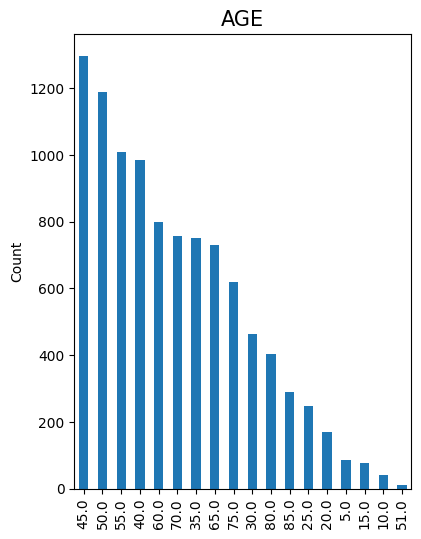

In [131]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()
plt.show()

Skin diseases are found to be maximum in people aged around 45. Minimum for 10 and below. We also observe that the probability of having skin disease increases with the increase in age.

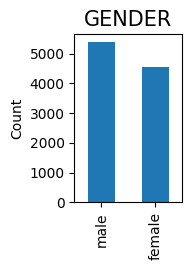

In [132]:
plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()
plt.show()

Skin diseases are more prominent in Men as compared to Women and other gender.

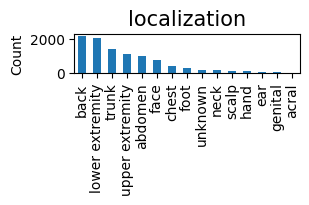

In [133]:
plt.subplot(8,2,5)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=90)
df['localization'].value_counts().plot.bar()
plt.show()

Skin diseases are more visible on the "back" of the body and least on the "acral surfaces"(such as limbs, fingers, or ears).

BIVARIATE ANALYSIS

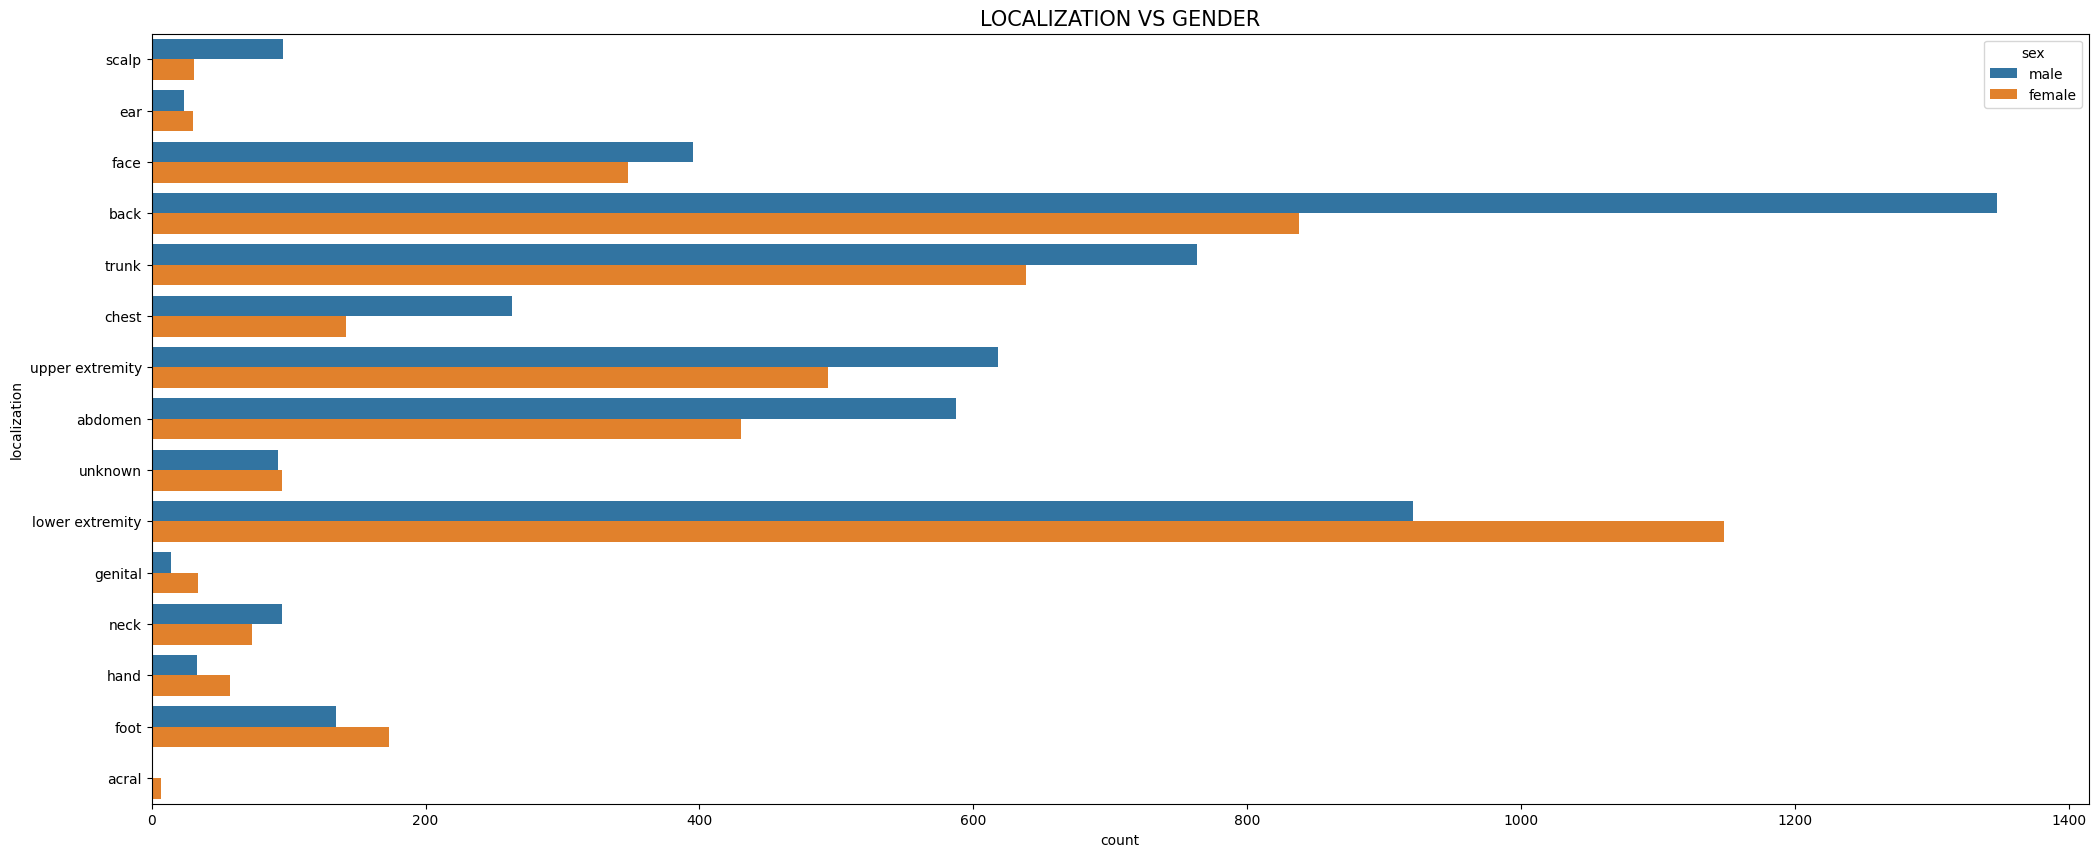

In [134]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)
plt.show()

Back are is the most affected among people and more prominent in men.

Infection on Lower extremity of the body is more visible in women.

Some unknown regions also show infections and it's visible in men, women and other genders.

The acral surfaces show the least infection cases that too in men only. Other gender groups don't show this kind of infection.

**Use to ordinal Encoder to covert into integer**

In [135]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df[["dx","dx_type","sex","localization"]])
df[["dx","dx_type","sex","localization"]]= oe.transform(df[["dx","dx_type","sex","localization"]])

In [154]:
df.head(20)

,dx,dx_type,age,sex,localization
0,2.0,3.0,80.0,1.0,11.0
1,2.0,3.0,80.0,1.0,11.0
2,2.0,3.0,80.0,1.0,11.0
3,2.0,3.0,80.0,1.0,11.0
4,2.0,3.0,75.0,1.0,4.0
5,2.0,3.0,75.0,1.0,4.0
6,2.0,3.0,60.0,1.0,5.0
7,2.0,3.0,60.0,1.0,5.0
8,2.0,3.0,70.0,0.0,2.0
9,2.0,3.0,70.0,0.0,2.0


Separate x & y value

In [137]:
x=df.drop(['localization'],axis=1)

In [138]:
x

,dx,dx_type,age,sex
0,2.0,3.0,80.0,1.0
1,2.0,3.0,80.0,1.0
2,2.0,3.0,80.0,1.0
3,2.0,3.0,80.0,1.0
4,2.0,3.0,75.0,1.0
...,...,...,...,...
10010,0.0,3.0,40.0,1.0
10011,0.0,3.0,40.0,1.0
10012,0.0,3.0,40.0,1.0
10013,0.0,3.0,80.0,1.0
